## Class 10
## Plotting Points data: 311 data 📲 📲 📲 📲 

c4sue NYU @avigailvantu

Today we will continue to work with Pandas and Matplotlib. We will also create some maps using geopandas. Looking into 311 complaints from the past month and from the same period in 2019 we will compare, group and visualize the city’s trends. Along the way we will create a GeoDataFrame, this is a geographical format that is similar enough to a data frame but has an extra dimension of geographical attributes to it.  Think of the times where we loaded a CSV data into QGIS and needed to merge with a swapfile of assign column to a geographical unit.

This week we will be doing something similar, only with that we will transform a csv (which we will read into a data frame) and then assign columns in the data to represent geometry. That would enable us to then visualize the data quite easily. We’ll some pretty simple, yet cool, ways to do so!

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame

For this assignment I downloaded the 311 data from the NYC Open Data platform. I wanted to look into how people in the city complaint patterns were in the past month. In order to get a relative understating I will compare the data from 2020 to the same dates last year. Comparing similar periods in between years is a common method in highlighting changes and trends.  Thinking about time series, many phenomenas are seasonal. Which is why comparing one month to the previous month (feb 2020 in our case) would be tricker. Having said that, even the same period in two separate years is likely to have some differences, but hopefully less. 

- Data 2020: March 13th 2020-April 13th 2020
- Data 2019: March 13th 2019-April 13th 2019 

Both datasets are in this repo, but you are welcome to download it yourself too 

In [3]:
#load 311 data 1 for this year and one for last year: 

data20 = pd.read_csv('311_March_April2020.csv')

#load 2019 data 

data19 = pd.read_csv('311_March-April2019.csv')

C:\Users\markh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\markh\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data20.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45810033,03/13/2020 12:00:00 AM,03/13/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10025.0,731 COLUMBUS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.792597,-73.967706,"(40.79259692123458, -73.96770625127942)"
1,45810013,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11223.0,813 AVENUE U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.598134,-73.962817,"(40.5981342031965, -73.96281658993895)"
2,45789543,03/13/2020 12:00:00 AM,03/26/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11430.0,JFK BUILDING 59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.649150,-73.782833,"(40.64915023440445, -73.78283340618265)"
3,45775220,03/13/2020 12:00:00 AM,03/27/2020 10:30:11 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11235.0,2255 EMMONS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.583689,-73.944691,"(40.583689259183544, -73.94469056810513)"
4,45776994,03/13/2020 12:00:33 AM,03/13/2020 01:58:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10034.0,4892 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867210,-73.922534,"(40.86720968747772, -73.92253385348529)"


In [5]:
data19.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,41949440,03/13/2019 12:00:00 AM,NaN,DEP,Department of Environmental Protection,FATF,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41947950,03/13/2019 12:00:00 AM,03/27/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41936816,03/13/2019 12:00:00 AM,03/26/2019 07:53:13 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10029,334 EAST 100 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.786187,-73.943778,"(40.78618701810895, -73.94377846199588)"
3,41936820,03/13/2019 12:00:00 AM,03/14/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Mixed Use Building,11377,41-35 50 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745851,-73.914349,"(40.745851381123025, -73.91434915337972)"
4,41939629,03/13/2019 12:00:00 AM,03/15/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11225,426 EASTERN PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.669515,-73.954367,"(40.669514860130114, -73.95436678857554)"


In [10]:
print ('shape 2020',data20.shape)
print ('shape 2019',data19.shape)

shape 2020 (137829, 41)
shape 2019 (229734, 41)


What are the changes between 2019 and 2020 data in terms of quantities of non emargency complaints in NYC? 

In [11]:
#What are the columns in the data? 
print ('2020 columns:',data20.columns)
print ('2019 columns:',data19.columns)

2020 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')
2019 columns: Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Loca

# 311 data for 2019 and 2020 data by agency: 

Let's look into the "value_counts" function. That would return the number of values for each value in the Agencey column. Meaning we will get a list of how many complaints were chanaled into each agency. 

Check out this URL for the agencies acronyms
https://www1.nyc.gov/site/mocs/about/agencies-acronyms-initialisms.page

In [12]:
data19['Agency'].value_counts()

NYPD     64013
HPD      46643
DSNY     38190
DOT      26634
DEP      15647
DOB      13716
DPR       6655
DOHMH     5734
DOF       5249
TLC       2780
DCA       1399
DHS        996
HRA        864
DFTA       739
DOE        160
EDC        116
DCAS        87
DOITT       51
ACS         28
TAX         23
NYCEM        6
DCP          3
TAT          1
Name: Agency, dtype: int64

In [13]:
data20['Agency'].value_counts()

NYPD     59168
HPD      27735
DOT      13971
DCA      12091
DEP       7707
DSNY      4278
DOB       4226
DOHMH     3372
DPR       3152
DHS       1316
TLC        468
EDC        273
DOE         62
DOITT       10
Name: Agency, dtype: int64

- What are some of the differences in patterns we are seeing in which agencies the calls have been channeled to between 2019 and 2020?  Which agencies have been seeing less activity and which ones more? 

The patterns are that as certain calls in 2019 have been made, there are fewer issues to solve, since 311 calls lead to progress in building and repairs. Some agencies that have seen less activity include: NYPD, DOE, DOITT. 

Agencies that have had more calls: DCA


So far we worked mainly with Pandas (also some pyplot, numpy and datetime). In addiition to all these pacakges Pyhton also has some pretty neat geographical features! Let's check out a few of them on our data: 

## From DataFrame to GeoDataFrame 🧮

GeoDataFrame is a data frame that includes one column with a "special" status. This column is the "geometry" column which enbales Python to refer to the data as geogpraphical. In many cases, like in our case, we will not have the "geomtry" column built-in in the data. Instead, we will usually have x any y or Latitue and Longtitude that we will tranform into the needed format. 

To go from DataFRame---> GeoDataFrame:
- we would want to tell python which columns can be used as "geometry". 

Note that the Geometry columns looks like this


- POINT (LON LAT) 

The point() format will be created using the GeoDataFrame function. We will only need to tell Python which columns in the data are each (lon, lat).  


In [ ]:
#transform data into geo data frame: 

gdf20 = gpd.GeoDataFrame(
    data20, geometry=gpd.points_from_xy(data20.Longitude, data20.Latitude))

gdf19 = gpd.GeoDataFrame(
    data19, geometry=gpd.points_from_xy(data19.Longitude, data19.Latitude))

#note that here we tell Python that the column: 
#data20.Longitude is the longtitute and data20.Latitude is the latitude. 

In [ ]:
#check out our GeoDataFrame--> note the "geometry" column was added (all the way to the right)
gdf20.head(3)

## Now we can fianly visualize the data: 

First: plot all points for the layer, not I am setting the marker zise on 0.3 since there are so many of them!! 

In [ ]:
#plot all 2020 data:
gdf20.plot( color='red',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2020')
plt.show()

In [ ]:
#plot all 2019 data: 
gdf19.plot( color='blue',legend=True,figsize=(12, 12),markersize=0.3)
plt.axis('off')
plt.title('311 complaints March13th-April 13th 2019')
plt.show()

# Exmine one agency: 
### HPD (Housing Preservation & Development)

In order to make better sense of what are people reporting less in these past weeks, we will take a closer look at the different agencies complaints. 

We will start with HPD: 

In [ ]:
#filter only hpd

hpd19 = gdf19.loc[gdf19['Agency']=='HPD']
hpd20 = gdf20.loc[gdf20['Agency']=='HPD']

## Plot HPD data for both 2019 and 2020 

In [ ]:
hpd19.plot( color='blue',legend=True,figsize=(12, 12), markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2019')
hpd20.plot( color='red',legend=True,figsize=(12, 12),markersize=2)
plt.axis('off')
plt.title('311 HPD complaints March13th-April 13th 2020')
plt.show()

 Q: Which areas seem to see the most impact in terms of "lost complaints"? 
 
## Another way for us to look into the data is to sub-slice it again: 

Now dive into the complaint types in the HPD complaints. So we can learn what are the types of housing complaint we are seeing. that would also help us compare what were some of the changes b/t both periods

In [ ]:
#plot hpd by complaint type:

#1. for 2019 
ax = hpd19.plot(column='Complaint Type',legend=True,figsize=(12, 12), alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March13th - April 13th 2019 by Complaint type')
plt.axis('off')
plt.show()


#2. for 2020 
ax = hpd20.plot(column='Complaint Type',legend=True,figsize=(12, 12),alpha = 0.6,markersize=2)
#we can also visualize HPD complaints based on the complaint type: 
plt.title('311 HPD complaints March13th - April 13th 2020 by Complaint type')
plt.axis('off')
plt.show()

What information can we take away from these two maps? 

# Another way to look into the complaint types: 
On top of visualizng the data we can also look into the number of complaints of each type. An easy way to do so is to use the Group.by command. This is a pretty timple command that has a lot of options (more about it on other classes!). 

The main thing to know about group.by right now is that group.by operates on a dataframe so that it basically does 3 main things: 

1. Split : take the data and splits it according to the grouping condition 
2. Apply: calculates what we want it to do: sum, means count etc
3. Combine: it combines the data into new groups 




In [ ]:
hpd19['Complaint Type'].unique()

In our case we will count group by complaint type so that: Python will Split the data according to each type of complaint (hot water, windows etc). Then it will Apply, meaning it would count how many of each compliant type the data has. Finally, Python will Combine the new grouped data. So in our case that would be number of complaints per each complaint type. Note that by doing so, our data frame structure will changes completely so that each row will represent a complaint type, and the data in the cells will be the count of how many of them are there in our data.  All that in one line of code :-) 

In [ ]:
#group.by hpd complaints 

#1. for 2019
hpd19_count_type = hpd19.groupby(['Complaint Type']).count()
#1. for 2020
hpd20_count_type = hpd20.groupby(['Complaint Type']).count()

In [ ]:
#look at out new data for 2019 
hpd19_count_type.head()

In [ ]:
#and for 2020
hpd20_count_type.head()

In [ ]:
#because the all columns look the same we will remove them and only keep the first one

hpd19_count_type = hpd19_count_type['Unique Key']
hpd20_count_type = hpd20_count_type['Unique Key']


In [ ]:
hpd19_count_type.head()

In [ ]:
#now let's see the most common HPD complaints for both March/April 2019 and 2020:

# sort data 

hpd19_count_type = hpd19_count_type.sort_values()

hpd20_count_type = hpd20_count_type.sort_values()

In [ ]:
#5 most common complaints in 2019 were: 
hpd19_count_type.tail(5)

In [ ]:

#5 most common complaints in 2020  were: 
hpd20_count_type.tail(5)

 We see that the 5 most common HPD complaints in 2019 and 2020 remained the same. But we are seeing a lot less of many of these types (e.g. more than half less Unsanitary conditions  in 2020 compared to 2019)

## here are the top 5 for both years :
1. Heat/hot water --> 14840 in 2020 and 17742 in 2019 
2. Unsanitary conditions --> 2988 in 2020 and 6218	in 2019 
3. Paint/ Plaster --> 1499 in 2020 and 4661 in 2019 
4. Plumbing --> 2427 in 2020 and 4065 in 2019
5. Door/Window --> 1194 in 2020 and 3001 in 2019 

## Assignment:

Your turn: 

So far we worked on the HPD data. 

We will now divide into groups, when each group will look into another agency complaints: 

# Group 1: NYPD: 
# Group 2: DOT 
# Group 3: DEP 
# Group 4: DSNY: Amadou, Mark, Duke, Vidya, David
# Group 5: DOHMH 

For each groups: 

1. Please filter the subset of the data that has *YOUR* Agencey name
2. Plot, summarize and group.by the data for both 2019 and 2020 
 
Deliver:  
- a. What are the patterns in *YOUR* agency complaints between the 2019 and 2020 data? 
- b. What are some geogrpaphical patterns you are seeing comparing both years?

In class: present your main findings. For you homework: submit your jupyter notebook. In addition on your NYU classes submissions write a short summary of your findings. 

Due: April 27th 2020 before class.

In [4]:
#your code... 

dsny19 = data19.loc[data19['Agency']=='DSNY']
dsny20 = data20.loc[data20['Agency']=='DSNY']

dsny19.groupby('Complaint Type').tail()
# dsny20['Complaint Type'].tail(5)
# .groupby('Complaint Type').sortby("", )

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
418,41944859,03/13/2019 01:49:00 AM,03/15/2019 12:00:00 PM,DSNY,BCC - Staten Island,Snow,15I Street Condition Ice-Non Storm,Street,10301,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.615719,-74.096232,"(40.61571878022965, -74.09623194212243)"
1042,41944822,03/13/2019 08:10:00 AM,03/14/2019 12:00:00 PM,DSNY,BCC - Staten Island,Snow,15I Street Condition Ice-Non Storm,Street,10308,24 RUSTIC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.548016,-74.145315,"(40.548015983427604, -74.14531535518424)"
9119,41958859,03/14/2019 08:30:00 AM,03/15/2019 12:00:00 PM,DSNY,A - Manhattan,Snow,E9 Snow / Icy Sidewalk,Sidewalk,10006,90 WEST STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710104,-74.014789,"(40.71010438228108, -74.01478869474265)"
11413,41958828,03/14/2019 12:42:00 PM,03/15/2019 12:00:00 PM,DSNY,A - Manhattan,Snow,E9 Snow / Icy Sidewalk,Sidewalk,10036,504 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.763683,-73.993325,"(40.76368271098699, -73.99332529434737)"
20457,41975650,03/15/2019 03:14:00 PM,03/16/2019 12:00:00 PM,DSNY,BCC - Staten Island,Overflowing Recycling Baskets,6R Overflowing Recycling Baskets,Sidewalk,10314,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.619923,-74.164585,"(40.61992311960711, -74.16458480830795)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229576,42206955,04/12/2019 11:35:00 PM,04/15/2019 09:22:00 AM,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,11377,40-33 62 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.743605,-73.902595,"(40.74360506761409, -73.90259452393433)"
229585,42205471,04/12/2019 11:37:00 PM,04/23/2019 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11213,1530 PARK PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.672130,-73.926629,"(40.67213001013028, -73.92662854601576)"
229595,42212798,04/12/2019 11:41:00 PM,04/13/2019 12:00:00 PM,DSNY,Bronx 04,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,10452,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.831900,-73.928563,"(40.831900200234024, -73.92856270428858)"
229610,42204803,04/12/2019 11:45:00 PM,04/15/2019 01:00:00 PM,DSNY,Department of Sanitation,Electronics Waste Appointment,Ewaste appointment,Sidewalk,10303,6 MACORMAC PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636605,-74.168744,"(40.63660544008755, -74.16874421913744)"


In [5]:
dsny20.groupby('Complaint Type').tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
19715,45847161,03/16/2020 05:22:00 PM,NaN,DSNY,Lot Cleaning,Vacant Lot,8 Request to Clean Vacant Lot,Lot,11234.0,2237 EAST 74 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618929,-73.902737,"(40.61892932162475, -73.90273683819277)"
54204,45887771,03/23/2020 03:46:00 PM,03/27/2020 12:00:00 PM,DSNY,Bronx 04,Litter Basket / Request,10 Litter Basket / Request,Sidewalk,10451.0,674 WALTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.822951,-73.926625,"(40.822951210574885, -73.92662484148276)"
54315,45890454,03/23/2020 04:18:00 PM,03/24/2020 12:00:00 PM,DSNY,A - Brooklyn,Recycling Enforcement,ER2 Resident Recyc. (Tenant),Sidewalk,11211.0,356 SOUTH 1 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710620,-73.952773,"(40.71061989437925, -73.95277319848549)"
54436,45886235,03/23/2020 04:45:00 PM,03/25/2020 12:00:00 PM,DSNY,BCC - Queens West,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11105.0,20-43 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.780192,-73.908853,"(40.780192143302045, -73.90885267708998)"
54601,45885566,03/23/2020 05:23:00 PM,03/28/2020 12:00:00 PM,DSNY,BCC - Queens East,Missed Collection (All Materials),1R Missed Recycling-All Materials,Sidewalk,11691.0,29-47 FAR ROCKAWAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.598527,-73.764457,"(40.5985273914399, -73.7644565934571)"
62119,45892185,03/25/2020 12:42:00 PM,03/26/2020 12:00:00 PM,DSNY,A - Staten Island,Recycling Enforcement,ER1 Resident Recyc. (Owner/Manager,Sidewalk,10312.0,154 STROUD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553422,-74.173810,"(40.553422103341795, -74.17380960596277)"
71068,45910537,03/27/2020 02:47:00 PM,03/31/2020 12:00:00 PM,DSNY,BCC - Brooklyn South,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11219.0,1155 42 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640956,-73.991352,"(40.64095590234112, -73.99135217405616)"
75913,45912788,03/28/2020 05:44:00 PM,03/30/2020 12:00:00 PM,DSNY,BCC - Bronx,Missed Collection (All Materials),1C Uncollected Xmas Trees,Sidewalk,10472.0,1977 CHATTERTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.827390,-73.857254,"(40.827390286945075, -73.85725428582039)"
84669,45922856,03/30/2020 08:56:00 PM,03/31/2020 12:00:00 PM,DSNY,BCC - Brooklyn North,Missed Collection (All Materials),1C Uncollected Xmas Trees,Sidewalk,11225.0,354 RUTLAND ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.659489,-73.949021,"(40.659488683569315, -73.94902131750706)"
88500,45930062,03/31/2020 06:07:00 PM,NaN,DSNY,P - Commercial Recycling Citywide,Recycling Enforcement,ER6 Comm. Recyc. (Comm. Tenant),Sidewalk,10303.0,2040 FOREST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.626017,-74.156541,"(40.62601682080635, -74.1565411314774)"


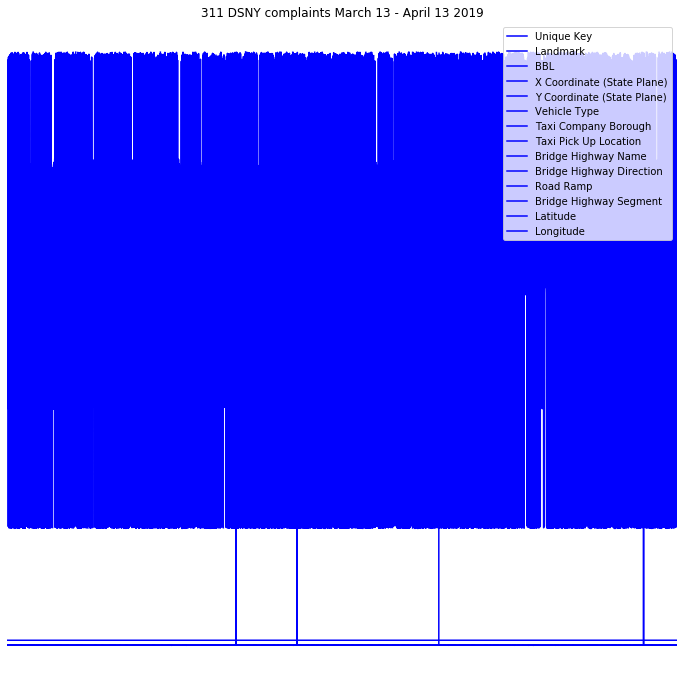

In [43]:
dsny19.plot(color='blue',legend=True,figsize=(12,12),markersize=1)
plt.axis('off')
plt.title("311 DSNY complaints March 13 - April 13 2019")
plt.show()

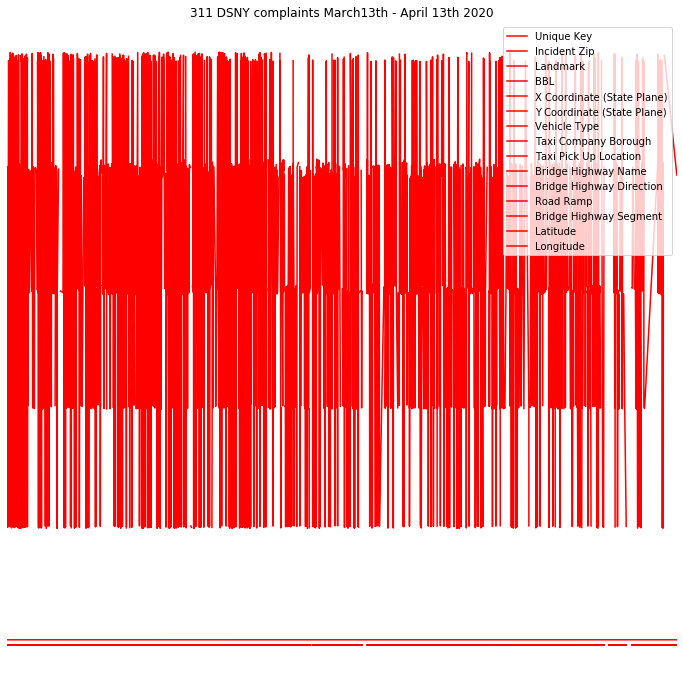

In [6]:
dsny20.plot(color='red',legend=True,figsize=(12,12), markersize=1)
plt.axis("off")
plt.title('311 DSNY complaints March13th - April 13th 2020')
plt.show()

AttributeError: 'Line2D' object has no property 'column'

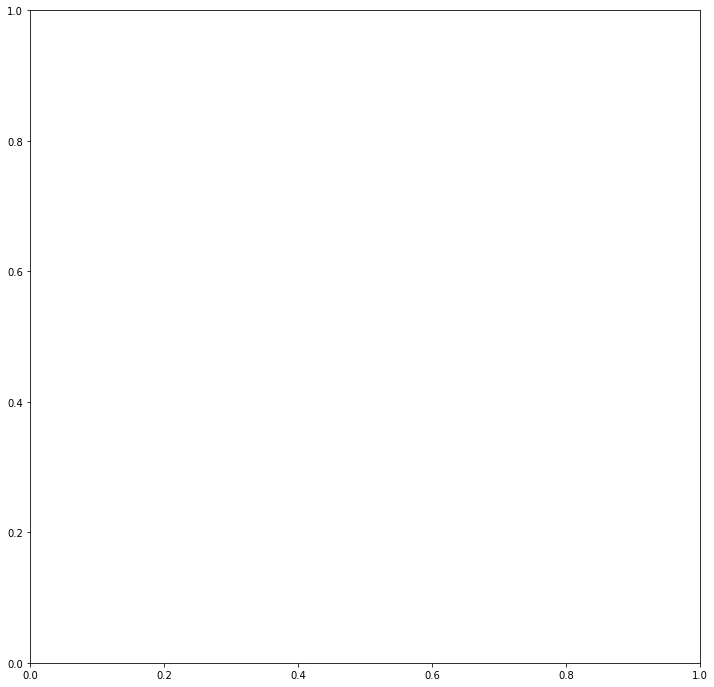

In [7]:
ax = dsny19.plot(column='Complaint Type',legend=True,figsize=(12,12),alpha=0.6,markersize=1)
plt.axis('off')
plt.title("311 DSNY complaints March 13 - April 13 2019 by complaint type")
plt.show()

In [ ]:
ax = dsny20.plot(column='Complaint Type',legend=True,figsize=(12,12),alpha=0.6,markersize=1)
plt.title("311 DSNY complaints March 13 - April 13 2020 by complaint type")
plt.axis('off')
plt.show()

In [26]:
dsny19_count_type = dsny19.groupby(["Complaint Type"]).count()
dsny19_count_type.sort_values(by="Unique Key").tail(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Dirty Conditions,3377,3377,3377,3377,3377,3377,3377,3321,2713,2713,...,0,0,0,0,0,0,0,3318,3318,3318
Sanitation Condition,3602,3602,3602,3602,3602,3602,3602,3491,2847,2847,...,0,0,0,0,0,0,0,3484,3484,3484
Derelict Vehicles,3610,3610,3610,3610,3610,3610,3610,3563,2878,2878,...,0,0,0,0,0,0,0,3562,3562,3562
Missed Collection (All Materials),3776,3776,3776,3776,3776,3776,3563,3776,3776,3776,...,0,0,0,0,0,0,0,3776,3776,3776
Request Large Bulky Item Collection,17670,17670,17670,17670,17670,17670,17670,17666,17670,17670,...,0,0,0,0,0,0,0,17666,17666,17666


In [24]:
dsny20_count_type = dsny20.groupby(["Complaint Type"]).count()
dsny20_count_type.sort_values(by="Unique Key").tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Sanitation Condition,145,145,143,145,145,145,145,142,142,142,...,0,0,0,0,0,0,0,142,142,142
Graffiti,483,483,0,483,483,483,395,446,483,483,...,0,0,0,0,0,0,0,446,446,446
Dirty Conditions,1117,1117,1026,1117,1117,1117,1117,1029,1030,1030,...,0,0,0,0,0,0,0,1029,1029,1029
Derelict Vehicles,1146,1146,1111,1146,1146,1146,1146,1057,1076,1076,...,0,0,0,0,0,0,0,1056,1056,1056
Missed Collection (All Materials),1284,1284,1284,1284,1284,1284,1233,1284,1284,1284,...,0,0,0,0,0,0,0,1284,1284,1284


In [18]:
#Summary: 

#In terms of graphing, the graphs are attached. In my case, I ran into issues with mapping the data using Shapely Geopandas 
#package. The graphs are attached below.

#Some patterns in our agency complaints between the 2019 and 2020 data: For 2019, the top five complaint types are Dirty 
#conditions,sanitation condition, derelict vehicles, missed collection(all materials),and large bulky item collection request. 
#For 2020, the most common issues included: missed collection(all materials), derelict vehicles, dirty conditions, graffiti, and litter
#sanitation conditions. It seems that over time, dirty conditions and missed collection(all materials) have decreased in
#prevalence, while sanitation requests and graffiti 311 calls have increased. In terms of derelict (disuse and neglect, 
#meaning poor quality) vehicles, as well as dirty conditions and sanitations issues have seemed to be common issues. 
#However, there has been an increase in how serious dirty conditions and snaitation issues could be in 2020, given that there 
#is a Covid-19 coronavirus, which could make people susceptible to infection, since they could get very sick. 

#Some geogrpaphical patterns we are seeing comparing both years: in all five burrows of Manhattan, Queens, Brooklyn, Bronx, and
#Staten Island, there seem to be a decrease in 311 calls, as indicated by the less densely shaded-in map of 311 calls in 2020.
#The 2019 chart seems to show that the issues are more dispersed, meaning that the issues are either not affecting as many 
#people in 2019, or certain issues were resolved completely, or maybe the issues that are still prevelent are ones that are 
#spread out, or happen to only certain people. Some reasons behind the decrease in complaints could be renovations, cleanups, 
#policy or legislation changes, humanitarian/NGO efforts, traffic protocols, increase in personal accountability, etc. 
#I would also like to mention that areas that have undergone rennovation, and/or gentrification might have reduced issues of one
#type, but might have an increase in others. This does also mean that while there are fewer complaints, this is only gradual 
#improvement. Plus, 2020 is not over yet, so this data is incomplete, and should not be compared to full year 2019 data. 

#Since 311 is used to discover information about services, make complaints, or report problems like graffiti or road damage,
#since there have been fixes and legislation passed. However, there seems to be no accountability for personal lifestyle, 
#as derelict vehicles might mean that people are too lazy, or poor, to either fix or replace their vehicles.
#Plus, dirty conditions and sanitation could either mean the condition of public spaces, or of personal spaces. So, it is 
#crucial to not only pass rules preventating dirty living conditions, but to promote sanitation equipment such as soap, hand
#sanitizer, toilet paper, tampons/pads, wipes, paper towels, bleach, etc. Public service announcements have also changed people
#into adopting healthier living conditions. 

In [16]:
display(file="DSNY2020.png")

In [17]:
display(file="DSNY2019.png")